The text pre-processing steps

Noise Removal

In [4]:
import pandas as pd
import re

In [24]:
pip install langdetect

python(65147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 4.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=fcd02ee5fa03c4ea78abf87d9466d98929132053fd194de9977df65d4d5751f2
  Stored in directory: /Users/ervinballa/Library/Caches/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install matplotlib

python(65932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 5.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 6.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('sample1.csv')
df.columns

Index(['issue_url', 'issue_label', 'issue_created_at',
       'issue_author_association', 'repository_url', 'issue_title',
       'issue_body'],
      dtype='object')

In [ ]:
df['text'] = df['issue_title']+ " " + df['issue_body'] #combining the fields
df['text'].head


<bound method NDFrame.head of 0        __tileSrcRect is null in Entities.ldtk Sample ...
1        Update the blog link in the SEF Site **Describ...
2        🐛 Parser cannot properly distinguish between p...
3        "Row added" snackbar is not visible if the gri...
4        [CRASH]  _tcp_write_on_socket crashes when flu...
                               ...                        
72284    [HELP] Volume Mount hostpath: Unable to mount ...
72285    is form.progress valid for upload progress? I ...
72286    RPi used for door contact sensors, warning in ...
72287    Tail latency of envoy proxy is bad if every re...
72288    Setting the date value programmatically  after...
Name: text, Length: 72289, dtype: object>

In [19]:
def remove_noise(text):
    # Remove special characters and numbers except question marks
    text = re.sub(r'[^a-zA-Z\s?]', '', str(text))
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text'] = df['text'].apply(remove_noise)
df['cleaned_text'].head()

0    tileSrcRect is null in Entitiesldtk Sample But...
1    Update the blog link in the SEF Site Describe ...
2    Parser cannot properly distinguish between par...
3    Row added snackbar is not visible if the grid ...
4    CRASH tcpwriteonsocket crashes when flushing a...
Name: cleaned_text, dtype: object

In [22]:
# Function to check for emojis and links
def contains_emojis_or_links(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    link_pattern = re.compile(r'http\S+|www\S+')
    return bool(emoji_pattern.search(text)) or bool(link_pattern.search(text))

# Function to remove emojis and links
def remove_emojis_and_links(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    link_pattern = re.compile(r'http\S+|www\S+')
    text = emoji_pattern.sub(r'', text)
    text = link_pattern.sub(r'', text)
    return text

# Check for emojis or links
df['contains_emojis_or_links'] = df['cleaned_text'].apply(contains_emojis_or_links)

# Remove emojis and links
df['cleaned_text'] = df['cleaned_text'].apply(remove_emojis_and_links)

# Display the updated dataframe
df['cleaned_text']

0        tileSrcRect is null in Entitiesldtk Sample But...
1        Update the blog link in the SEF Site Describe ...
2        Parser cannot properly distinguish between par...
3        Row added snackbar is not visible if the grid ...
4        CRASH tcpwriteonsocket crashes when flushing a...
                               ...                        
72284    HELP Volume Mount hostpath Unable to mount vol...
72285    is formprogress valid for upload progress? I t...
72286    RPi used for door contact sensors warning in l...
72287    Tail latency of envoy proxy is bad if every re...
72288    Setting the date value programmatically after ...
Name: cleaned_text, Length: 72289, dtype: object

Filtering out non English text

In [25]:
from langdetect import detect, DetectorFactory

In [26]:
DetectorFactory.seed = 0

In [27]:
def is_english(text):
    try:
        return detect(text) == 'en' 
    except:
        return False  # Return False if detection fails

# Applying the language detection function to filter only English records
df = df[df['text'].apply(is_english)]



In [28]:
df

,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body,text,cleaned_text,contains_emojis_or_links
0,https://api.github.com/repos/deepnight/ldtk/is...,bug,2021-03-10T01:39:16Z,CONTRIBUTOR,https://api.github.com/repos/deepnight/ldtk,__tileSrcRect is null in Entities.ldtk Sample ...,"In the Entities example, we there are some `__...",__tileSrcRect is null in Entities.ldtk Sample ...,tileSrcRect is null in Entitiesldtk Sample But...,False
1,https://api.github.com/repos/sef-global/sef-si...,bug,2021-01-30T13:51:30Z,COLLABORATOR,https://api.github.com/repos/sef-global/sef-site,Update the blog link in the SEF Site,**Describe the bug**\r\nUpdate the blog link i...,Update the blog link in the SEF Site **Describ...,Update the blog link in the SEF Site Describe ...,False
2,https://api.github.com/repos/cherry-script/che...,bug,2021-04-07T13:38:24Z,CONTRIBUTOR,https://api.github.com/repos/cherry-script/che...,🐛 Parser cannot properly distinguish between p...,Consider these two expressions:\r\n```\r\nf (g...,🐛 Parser cannot properly distinguish between p...,Parser cannot properly distinguish between par...,False
3,https://api.github.com/repos/IgniteUI/igniteui...,bug,2020-10-16T15:41:48Z,CONTRIBUTOR,https://api.github.com/repos/IgniteUI/igniteui...,"""Row added"" snackbar is not visible if the gri...",## Description \r\nWhen grid has no height an...,"""Row added"" snackbar is not visible if the gri...",Row added snackbar is not visible if the grid ...,False
4,https://api.github.com/repos/OpenSIPS/opensips...,bug,2020-09-21T21:22:05Z,NONE,https://api.github.com/repos/OpenSIPS/opensips,[CRASH] _tcp_write_on_socket crashes when flu...,<!--\r\nThank you for reporting a crash in Ope...,[CRASH] _tcp_write_on_socket crashes when flu...,CRASH tcpwriteonsocket crashes when flushing a...,False
...,...,...,...,...,...,...,...,...,...,...
72284,https://api.github.com/repos/rancher/k3d/issue...,question,2021-04-03T01:21:15Z,NONE,https://api.github.com/repos/rancher/k3d,[HELP] Volume Mount hostpath: Unable to mount ...,hi Team I am facing the below issue. Any solut...,[HELP] Volume Mount hostpath: Unable to mount ...,HELP Volume Mount hostpath Unable to mount vol...,False
72285,https://api.github.com/repos/node-formidable/f...,question,2020-02-17T12:38:57Z,NONE,https://api.github.com/repos/node-formidable/f...,is form.progress valid for upload progress?,I thought form.progress would get fired every ...,is form.progress valid for upload progress? I ...,is formprogress valid for upload progress? I t...,False
72286,https://api.github.com/repos/ebaauw/homebridge...,question,2021-03-16T00:45:36Z,NONE,https://api.github.com/repos/ebaauw/homebridge...,"RPi used for door contact sensors, warning in log",Thank you for the most excellent plug-in!! \r\...,"RPi used for door contact sensors, warning in ...",RPi used for door contact sensors warning in l...,False
72287,https://api.github.com/repos/envoyproxy/envoy/...,question,2020-08-18T23:28:15Z,NONE,https://api.github.com/repos/envoyproxy/envoy,Tail latency of envoy proxy is bad if every re...,We have envoy running as the front door servic...,Tail latency of envoy proxy is bad if every re...,Tail latency of envoy proxy is bad if every re...,False


Question mark counter

In [31]:

from matplotlib import pyplot as plt


python(65960) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(65962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Matplotlib is building the font cache; this may take a moment.


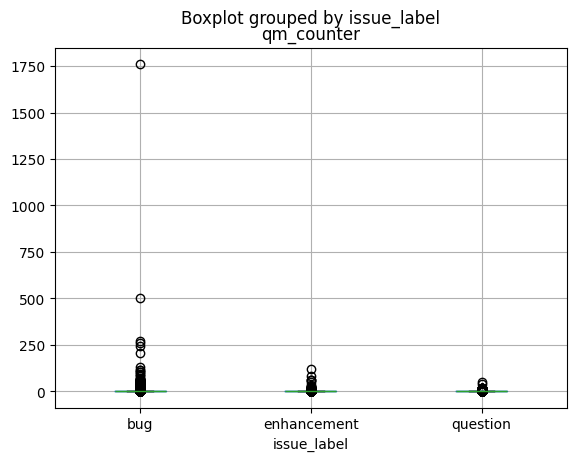

In [32]:
df['qm_counter'] = df['issue_body'].str.count(r'\?')
df.groupby('issue_label')['qm_counter'].mean()
df.boxplot(column='qm_counter', by='issue_label')
plt.show()